# Jonathan Souty - Inlämning 1
## 1. Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

line_break = '\n' + ('-' * 50) + '\n'

### Defining the local file path and loading it into a pandas dataframe

In [ ]:
file_path = 'C:/Users/jonat/Documents/python/pyabon/ml_inlämning_1/AmazonDataSales.csv'
df = pd.read_csv(file_path)

In [33]:
# setting option to display all the columns
pd.set_option('display.max_columns', None)
# using df.head() instead of print(df.head()) gives a better view of the data
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Amount_Log,Amount_Log_Scaled
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,6.474847,0.750460
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,6.008813,0.696445
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,5.799093,0.672137
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,6.625830,0.767959
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,6.354370,0.736496


In [ ]:
# describe the dataframe
print(df.describe(include='all'))

# total rows = 128 975
# there are a few duplicates of Order ID, seems like its the same order but with different products

In [25]:
# print datatypes
df.dtypes

# to do's
# change Date to datetime
# change ship-postal-code from float to int
# change B2B from bool to int(0,1)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [ ]:
# check for missing/null values
print("Count of missing values per column:")
print(df.isnull().sum())

In [ ]:
# check for duplicates
print("Count of duplicates:")
print(df.duplicated().sum())

## 2. Data Cleaning

In [ ]:
# check Courier Status column aswell as how many null values there are
print(df['Courier Status'].value_counts(dropna=False))

In [ ]:
# replace NaN values with 'Unknown'
df['Courier Status'].fillna('Unknown', inplace=True)
print(df['Courier Status'].value_counts(dropna=False))

In [ ]:
# visualize the distribution of amount column
plt.hist(df['Amount'], bins=100)
# figure size
plt.figure(figsize=(6, 2))
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
# give me a label for max value
plt.text(1000, 10000, 'Max value: 1000')

plt.show()

# which columns do i have?
print(df.columns)
# do you know which columns i have in AmazonDataSales.csv?



In [ ]:
# check the currency column
print(df['currency'].value_counts(dropna=False))

print(line_break)

# print the rows where currency is null
print(df[df['currency'].isnull()])

print(line_break)

# check how many rows there are where currency is null but the Amount column isnt null
print('Rows with null currency but not null Amount:')
print(df[(df['currency'].isnull()) & (df['Amount'].notnull())])

In [ ]:
# we only have INR currency so its safe to assume that the null values are INR
df['currency'].fillna('INR', inplace=True)
print(df['currency'].value_counts(dropna=False))

In [ ]:
# since the Amount column only has about 5% null values i have decided to drop those rows
df.dropna(subset=['Amount'], inplace=True)

# count total rows of amount
print('Total rows remaining:')
print(len(df['Amount']))

In [ ]:
# check the ship-city, ship-state, ship-postal-code, ship-country columns for NaN values
print(df['ship-city'].isnull().sum())
print(df['ship-state'].isnull().sum())
print(df['ship-postal-code'].isnull().sum())
print(df['ship-country'].isnull().sum())

print(line_break)

# check the rows where ship-city is not null
print(df[df['ship-city'].isnull()])

In [ ]:
# filling missing values with 'Unknown' in columns ship-city, ship-state, ship-country
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)

# since ship-postal-code is a float column i will change it to string and change the missing values to 'Unknown', we can leave it as string as we wont be doing any calculations on it
df['ship-postal-code'] = df['ship-postal-code'].astype(str)
df['ship-postal-code'].fillna('Unknown', inplace=True)

In [ ]:
# check all the columns for missing values in percentage compared to total rows and sort them in descending order
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.sort_values(ascending=False, inplace=True)
print(missing_percentage)

In [ ]:
# as we saw in the earlier block 'fulfilled-by', 'Unnamed: 22', 'promotion-ids' columns has 34-69% missing values so we will drop those columns
df.drop(['fulfilled-by', 'Unnamed: 22', 'promotion-ids'], axis=1, inplace=True)

In [ ]:
# check if the 'Qty' column has any negative values and correct them if true
if (df['Qty'] < 0).any():
    print('Qty has negative values. Corrected them now...')
    df['Qty'] = df['Qty'].clip(lower=0)
else:
    print('Qty has no negative values')

# check if the 'Amount' column has any negative values and correct them if true
if (df['Amount'] < 0).any():
    print('Amount has negative values. Corrected them now...')
    df['Amount'] = df['Amount'].clip(lower=0)
else:
    print('Amount has no negative values')

First I planned to use a normal if islower then convert to upper but apparently that wouldn't work with mixed upper/lower, the lambda function however, is able to do this.

In [ ]:
# checks for any lowercase character within each string and converts them to uppercase
lowercase_count = df['Style'].apply(lambda x: any(c.islower() for c in x)).sum()
total_row_count = len(df['Style'])

if lowercase_count > 0:
    print(f'Lowercase characters found in {lowercase_count}/{total_row_count} rows of Style column. Converted them to uppercase.')
    df['Style'] = df['Style'].str.upper()
else:
    print('All characters in Style column are already uppercase.')

In [ ]:
half_count = len(df) // 2

# convert the first half of the 'Style' column to lowercase
df.loc[:half_count, 'Style'] = df.loc[:half_count, 'Style'].str.lower()

# same as previous code block just to get the order right
if lowercase_count > 0:
    print(f'Lowercase characters found in {lowercase_count}/{total_row_count} rows of Style column. Converted them to uppercase.')
    df['Style'] = df['Style'].str.upper()
else:
    print('All characters in Style column are already uppercase.')

In [ ]:
# convert 'Date' column to datetime and change format to YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# print the first 5 rows of the Date column
print(df['Date'].head(10))

In [ ]:
# change all the 'Category' column values to lowercase
df['Category'] = df['Category'].str.lower()

# check the 'Category' column
print(df['Category'].value_counts(dropna=False))

In [ ]:
# check the cleaned dataset
print("DataFrame Description:")
print(df.describe(include='all'))

print(line_break)

# check all columns for missing values
print("Count of missing values per column:")
print(df.isnull().sum())

print(line_break)

# print total remaining rows
print('Total rows remaining:')
print(len(df))

## 3. Feature Engineering

### First we will create new columns using the Date column
#### I chose to only extract Weekday (Monday-Sunday) and Is_weekday TRUE/FALSE (0/1)

In [ ]:
# adding a column for 'Weekday' using the 'Date' column
df['Weekday'] = df['Date'].dt.day_name()

# adding a column for 'Is_weekday' using the 'Date' column
# the lambda function will check if the day of the week is 5 or 6 (saturday or sunday) and return 1 if true and 0 if false
df['Is_weekday'] = df['Date'].dt.dayofweek.apply(lambda x: 0 if x >= 5 else 1)

In [ ]:
# to check if it works we are printing only weekday and is_weekday columns, one where weekday is monday and the other where weekday is saturday
print(df[['Weekday', 'Is_weekday']][df['Weekday'] == 'Monday'].head())
print(df[['Weekday', 'Is_weekday']][df['Weekday'] == 'Saturday'].head())

### Converting the 'B2B' column from TRUE/FALSE to binary

In [ ]:
# check the values in the 'B2B' column
print(df['B2B'].value_counts(dropna=False))

print(line_break)

# check the datatype of the 'B2B' column
print(df['B2B'].dtypes)

In [ ]:
# convert the 'B2B' TRUE values to 1 and FALSE values to 0, since the datatype is bool we can just convert it to int
df['B2B'] = df['B2B'].astype(int)
print(df['B2B'].value_counts(dropna=False))

### Handling the 'Amount' column

In [ ]:
# lets find out more about the 'Amount' column
print("Description of 'Amount' column:")
print(df['Amount'].describe())

print(line_break)

# lets visualize the distribution of the 'Amount' column
print("Distribution of 'Amount' column:")
plt.figure(figsize=(6, 3))
plt.hist(df['Amount'], bins=100, edgecolor='black')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.axvline(df['Amount'].max(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['Amount'].max() + 500, 10000, 'Max', rotation=360)
plt.text(df['Amount'].max() + 500, 9000, df['Amount'].max())
plt.axvline(df['Amount'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.text(df['Amount'].mean() + 500, 10000, 'Mean', rotation=360)
plt.text(df['Amount'].mean() + 500, 9000, round(df['Amount'].mean(), 2))
plt.show()

In [30]:
# because I decided to do a log transformation on the 'Amount' column I will create a new column called 'Amount_Log' and apply the log transformation on the 'Amount' column
# also we will add 1 to the 'Amount_Log' column to avoid dividing by 0
df['Amount_Log'] = np.log(df['Amount'] + 1)

# lets scale the 'Amount_Log' column
scaler = MinMaxScaler()
df['Amount_Log_Scaled'] = scaler.fit_transform(df[['Amount_Log']])

Description of 'Amount_Log' column:
count    121180.000000
mean          6.295429
std           0.963910
min           0.000000
25%           6.109248
50%           6.406880
75%           6.670766
max           8.627840
Name: Amount_Log, dtype: float64

--------------------------------------------------

Description of 'Amount_Log_Scaled' column:
count    121180.000000
mean          0.729665
std           0.111721
min           0.000000
25%           0.708085
50%           0.742582
75%           0.773168
max           1.000000
Name: Amount_Log_Scaled, dtype: float64

--------------------------------------------------

Distribution of 'Amount_Log_Scaled' column:


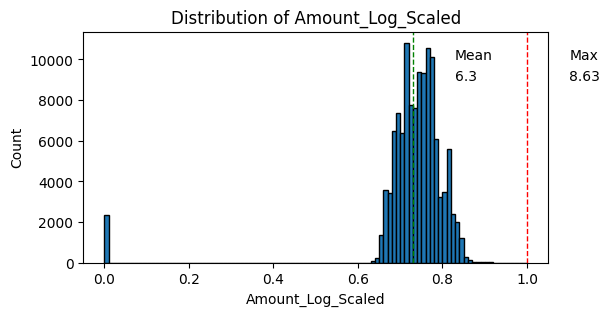

In [32]:
# describe the 'Amount_Log' column
print("Description of 'Amount_Log' column:")
print(df['Amount_Log'].describe())

print(line_break)

print("Description of 'Amount_Log_Scaled' column:")
print(df['Amount_Log_Scaled'].describe())

print(line_break)

# lets visualize the distribution of the 'Amount_Log' column
print("Distribution of 'Amount_Log_Scaled' column:")
plt.figure(figsize=(6, 3))
plt.hist(df['Amount_Log_Scaled'], bins=100, edgecolor='black')
plt.title('Distribution of Amount_Log_Scaled')
plt.xlabel('Amount_Log_Scaled')
plt.ylabel('Count')
plt.axvline(df['Amount_Log_Scaled'].max(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['Amount_Log_Scaled'].max() + 0.1, 10000, 'Max')
plt.text(df['Amount_Log_Scaled'].max() + 0.1, 9000, round(df['Amount_Log'].max(), 2))
plt.axvline(df['Amount_Log_Scaled'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.text(df['Amount_Log_Scaled'].mean() + 0.1, 10000, 'Mean')
plt.text(df['Amount_Log_Scaled'].mean() + 0.1, 9000, round(df['Amount_Log'].mean(), 2))
plt.show()

### Save the dataframe to csv

In [ ]:
# save an xlsx file of the cleaned dataset
df.to_excel('C:/Users/jonat/Documents/python/pyabon/ml_inlämning_1/AmazonDataSales_cleaned.xlsx', index=False)